Données initiales : 206 lignes.
ATTENTION : 120 lignes contenaient des erreurs ou vides et ont été supprimées.
Lignes restantes pour l'analyse : 86

RÉSULTATS DE LA RÉGRESSION : log(Y) = a*1 + b*D + ...
                            OLS Regression Results                            
Dep. Variable:                   2024   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     94.71
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           1.80e-35
Time:                        17:40:17   Log-Likelihood:                -61.535
No. Observations:                  86   AIC:                             139.1
Df Residuals:                      78   BIC:                             158.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
       

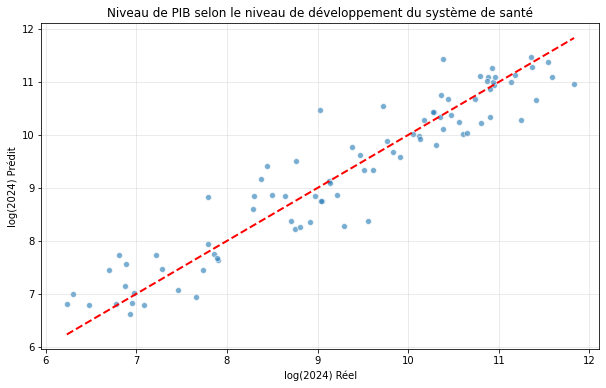

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ==========================================
# 1. ZONE DE CONFIGURATION 
# ==========================================

# Chemin vers ton fichier CSV
fichier_csv = 'Table_complète.csv'

# Nom exact de la colonne Y (celle qu'on va passer au logarithme)
colonne_Y = '2024'  # Exemple : remplace par ton vrai nom de colonne

# Liste des 7 noms exacts de tes colonnes explicatives (X)
colonnes_X = [
    'Personnel infirmier densité',          
    'Médecins pour 10k habitants',  
    'Capacité réponse sanitaire',     
    'Dépenses publiques santé',  
    'Accès eau potable sûre',        
    "Niveau d'assainissement",  
    'Déchets domestiques traités'   
]

# ==========================================
# 2. CHARGEMENT ET NETTOYAGE ROBUSTE
# ==========================================

# Astuce : si ton CSV utilise des virgules pour les décimales (format français "12,5"),
# ajoute decimal=',' dans read_csv. Sinon, garde le par défaut.
try:
    df = pd.read_csv(fichier_csv) # Ajoute decimal=',' si nécessaire
except FileNotFoundError:
    print(f"ERREUR : Le fichier '{fichier_csv}' est introuvable.")
    exit()

# Liste de toutes les colonnes utiles (Y + les X)
cols_utiles = [colonne_Y] + colonnes_X

# VÉRIFICATION DE L'EXISTENCE DES COLONNES
missing = [c for c in cols_utiles if c not in df.columns]
if missing:
    print(f"ERREUR: Colonnes introuvables : {missing}")
    exit()

print(f"Données initiales : {len(df)} lignes.")

# A. FORCER LE FORMAT NUMÉRIQUE
# Cela transforme les textes bizarres (ex: "Erreur", " ", "N/A") en NaN (vide)
for col in cols_utiles:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# B. RETIRER LES VALEURS INFINIES ET VIDES
# On remplace les infinis par des NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# On compte combien de lignes sont vides avant de supprimer
n_avant = len(df)
df = df.dropna(subset=cols_utiles)
n_apres = len(df)
n_suppr = n_avant - n_apres

if n_suppr > 0:
    print(f"ATTENTION : {n_suppr} lignes contenaient des erreurs ou vides et ont été supprimées.")
    print(f"Lignes restantes pour l'analyse : {n_apres}")
else:
    print("Aucune ligne vide détectée. Données propres.")

if len(df) == 0:
    print("ERREUR CRITIQUE : Toutes les lignes ont été supprimées ! Vérifie le format de ton CSV.")
    exit()

# ==========================================
# 3. PRÉPARATION MATHÉMATIQUE
# ==========================================

# Application du Logarithme sur Y (uniquement sur valeurs > 0)
df = df[df[colonne_Y] > 0] # Sécurité supplémentaire pour le log
y_log = np.log(df[colonne_Y])

# Sélection des variables X
X = df[colonnes_X]

# Ajout de la constante
X = sm.add_constant(X)

# ==========================================
# 3. TRAITEMENT MATHÉMATIQUE
# ==========================================

# Application du Logarithme sur Y
# On filtre les valeurs <= 0 pour éviter les erreurs mathématiques
df_clean = df[df[colonne_Y] > 0].copy()
y_log = np.log(df_clean[colonne_Y])

# Sélection des variables X
X = df_clean[colonnes_X]

# Ajout de la constante (Variable "1") pour l'intercepte (le coefficient 'a')
X = sm.add_constant(X)

# ==========================================
# 4. RÉGRESSION (OLS) ET RÉSULTATS
# ==========================================

model = sm.OLS(y_log, X)
results = model.fit()

print("\n" + "="*50)
print("RÉSULTATS DE LA RÉGRESSION : log(Y) = a*1 + b*D + ...")
print("="*50)
print(results.summary())

# Affichage clair de l'équation finale
coeffs = results.params

print("\n--- ÉQUATION PRÉDICTIVE ESTIMÉE ---")
print("log(Y) = ")
print(f"   {coeffs['const']:.5f} (Constante a)")

# On boucle pour afficher chaque variable avec son coefficient
mapping_lettres = ['b', 'c', 'd', 'e', 'h', 'i', 'j'] # Tes lettres mathématiques

for i, nom_col in enumerate(colonnes_X):
    coef_val = coeffs[nom_col]
    lettre = mapping_lettres[i] if i < len(mapping_lettres) else '?'
    signe = "+" if coef_val >= 0 else "" # Pour l'affichage joli
    print(f" {signe} {coef_val:.5f} * {nom_col} \t(coeff {lettre})")

# ==========================================
# 5. GRAPHIQUE (Réel vs Prédit)
# ==========================================
plt.figure(figsize=(10, 6))
pred_log = results.predict(X)
plt.scatter(y_log, pred_log, alpha=0.6, edgecolors='w')
plt.plot([y_log.min(), y_log.max()], [y_log.min(), y_log.max()], 'r--', lw=2)
plt.xlabel(f"log({colonne_Y}) Réel")
plt.ylabel(f"log({colonne_Y}) Prédit")
plt.title("Niveau de PIB selon le niveau de développement du système de santé")
plt.grid(True, alpha=0.3)
plt.show()


RÉSULTATS (Modèle réduit : D, G, H)
                            OLS Regression Results                            
Dep. Variable:                   2023   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           8.71e-48
Time:                        17:39:48   Log-Likelihood:                -204.69
No. Observations:                 180   AIC:                             417.4
Df Residuals:                     176   BIC:                             430.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

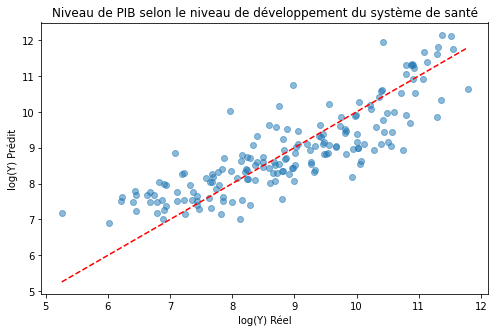

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ==========================================
# 1. ZONE DE CONFIGURATION (MODIFIÉE POUR 3 VARIABLES)
# ==========================================

fichier_csv = 'Table_complète.csv'  # Remplace par ton fichier
colonne_Y = '2023'            # Remplace par ta colonne Y

# On ne garde que 3 colonnes ici pour faire X = (1, D, G, H)
# Remplace les noms ci-dessous par les vrais noms de tes colonnes dans le CSV
colonnes_X = [
    'Personnel infirmier densité',          
    'Dépenses publiques santé',  
    'Capacité réponse sanitaire'         
]

# ==========================================
# 2. CHARGEMENT ET NETTOYAGE 
# ==========================================
try:
    df = pd.read_csv(fichier_csv) # Ajoute decimal=',' si ton Excel est en français
except FileNotFoundError:
    print(f"ERREUR : Le fichier '{fichier_csv}' est introuvable.")
    exit()

cols_utiles = [colonne_Y] + colonnes_X

# Vérification présence colonnes
missing = [c for c in cols_utiles if c not in df.columns]
if missing:
    print(f"ERREUR: Colonnes introuvables dans le CSV : {missing}")
    exit()

# Conversion numérique et nettoyage des infinis/NaN
for col in cols_utiles:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=cols_utiles)

if len(df) == 0:
    print("ERREUR : Plus aucune donnée après nettoyage.")
    exit()

# ==========================================
# 3. PRÉPARATION ET RÉGRESSION
# ==========================================

# Logarithme sur Y
df = df[df[colonne_Y] > 0]
y_log = np.log(df[colonne_Y])

# Sélection des variables X (D, G, H)
X = df[colonnes_X]

# Ajout de la constante (le "1")
X = sm.add_constant(X)

# Création du modèle
model = sm.OLS(y_log, X)
results = model.fit()

# ==========================================
# 4. RÉSULTATS
# ==========================================
print("\n" + "="*50)
print("RÉSULTATS (Modèle réduit : D, G, H)")
print("="*50)
print(results.summary())

coeffs = results.params
print("\n--- ÉQUATION ESTIMÉE ---")
print("log(Y) = ")
print(f"   {coeffs['const']:.4f} (Constante a)")

# Affichage dynamique des 3 variables
lettres = ['b', 'c', 'h'] # Correspondant à D, G, H
for i, nom_col in enumerate(colonnes_X):
    val = coeffs[nom_col]
    signe = "+" if val >= 0 else ""
    lettre = lettres[i] if i < len(lettres) else '?'
    print(f" {signe} {val:.4f} * {nom_col} \t(coeff {lettre})")

# ==========================================
# 5. VISUALISATION SIMPLE
# ==========================================
plt.figure(figsize=(8, 5))
ypred = results.predict(X)
plt.scatter(y_log, ypred, alpha=0.5)
plt.plot([y_log.min(), y_log.max()], [y_log.min(), y_log.max()], 'r--')
plt.xlabel("log(Y) Réel")
plt.ylabel("log(Y) Prédit")
plt.title("Niveau de PIB selon le niveau de développement du système de santé")
plt.show()